<a href="https://colab.research.google.com/github/harrisb002/CS_479/blob/Labs/lab7a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.13.0


## Credits
Some of the material in this notebook has been taken from a Coursera Deep Learning course

## Learning Objectives
 - Construct simple deep learning models using the Keras Sequential model
 - Compile and fit Sequential models to data using various loss functions and optimisers
 - Evaluate models on held-out data and make model predictions

# The Sequential model API

 ## Coding sections
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

### Import the different kinds of layers

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax
from tensorflow.keras.utils import plot_model


#### Build a feedforward neural network model

In [3]:
# TODO 1
# Build the Sequential feedforward neural network model.
# A Flatten layer that takes as input of shape (28, 28)
# 3 hidden layers,
#     the first one with 32 units and sigmoid activation function
#     the second and third with 16 units each and relu activation function
# and an output layer with 10 classes


In [4]:
model = Sequential([
    Flatten (input_shape=(28,28)),
    Dense(32, activation = 'sigmoid'),
    Dense(16, activation = 'relu'),
    Dense(16, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

Print the model summary to match with this:
![](model1.png)

In [5]:
for layer in model.layers:
    print(layer.output_shape)

(None, 784)
(None, 32)
(None, 16)
(None, 16)
(None, 10)


In [6]:
model.output_shape

(None, 10)

In [7]:
# Print the model summary
#model.weights
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 26090 (101.91 KB)
Trainable params: 26090 (101.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [9]:
# TODO 2
# Build the Sequential convolutional neural network model.

#Start with create a convolution layers with 16 layers, kernel size of 3, relu activation
#and input shape of (28, 28, 1)

#Next, add a max pooling layer of kernel size 3
#Then, a flatten layer
#Finally, a Dense layer with 10 units and softmax activation function



In [10]:
model2 = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(3, 3),
    Flatten(),
    Dense(10, activation='softmax')
])

Run model summary and obtain this:
![](model2.png)

In [11]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 26090 (101.91 KB)
Trainable params: 26090 (101.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Things to play with:
 - What happens if we remove the 1 in the `input_shape` parameter of `Conv2D` and just give (28, 28)?
 - how does the summary change if the convolution layer uses padding = 'SAME'?
 - how does the summary change if the convolution layer uses strides = 2


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

Use the `adam` optimizer, `sparse categorical crossentropy` as the loss function, and `accuracy` and `mae` as the metrics.

In [12]:
# TODO 3: Define the model optimizer, loss function and metrics
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)


### Things to play with:
 - What is the default learning rate of the [adam optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)? Change it to 0.005.


In [13]:
# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.metrics)


sparse_categorical_crossentropy
[]


***
<a id="coding_tutorial_4"></a>
## The fit method

In [14]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [15]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [16]:
# TODO 4: Print the shape of the training data and training labels
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [17]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]
print(train_labels[0])

9


In [18]:
# TODO 5: Rescale the values in train_images and test_image so that they lie in between 0 and 1.
train_images = train_images/255.
test_images = test_images/ 255.


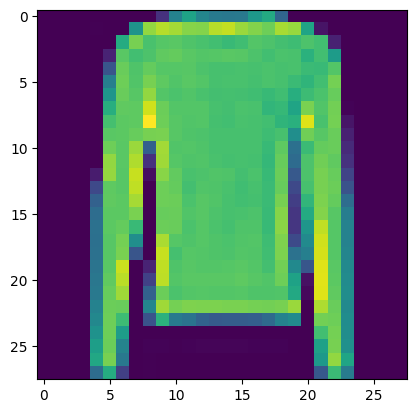

Label: Pullover


In [19]:
# Display one of the training images randomly (Run this cell several times to see different images)
i =  np.random.choice(train_images.shape[0])
img = train_images[i, :, :]
plt.imshow(img)
plt.show()
print("Label:", labels[train_labels[i]])




#### Fit the model

In [ ]:
# TODO 6: Fit the model using 8 epochs and batch size of 256. Store the output in variable called history
# NOTE: If training is taking long, use less number of epochs or a portion of the training set
history = model.fit(train_images, train_labels, epochs=8)


Epoch 1/8
1875/1875 [==============================] - 15s 7ms/step - loss: 0.6285 - accuracy: 0.7850
Epoch 2/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4064 - accuracy: 0.8542
Epoch 3/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3735 - accuracy: 0.8647
Epoch 4/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3535 - accuracy: 0.8733
Epoch 5/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3385 - accuracy: 0.8775
Epoch 6/8
1669/1875 [=========================>....] - ETA: 0s - loss: 0.3269 - accuracy: 0.8804

**SUPER DUPER IMPORTANT NOTE** If you run the above cell again, the training will resume from where it stopped the last time! To restart the training with default weights, re-create the model.

### Things to play with:
 - How does the training proceed if the `batch_size` is reduced? How does that impact the accuracy/mae?




#### Plot training history

In [ ]:
# Load the history into a pandas Dataframe
# Very useful to check how training is going

df = pd.DataFrame(history.history)
df.head()

In [ ]:
# Make a plot for the loss

loss_plot = df.plot(y="loss", title = "Loss vs. Epochs", legend = False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")
#loss_plot = df.plot(y="loss", title = "Loss vs. Epochs", legend = False)

In [ ]:
# Make a plot for the accuracy
acc_plot = df.plot(y="accuracy", title = "Accuracy vs. Epochs", legend = False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")


In [ ]:
# TODO 7: Make a plot for the additional metric (mae)
acc_plot = df.plot(y="mae", title = "Mae vs. Epochs", legend = False)
acc_plot.set(xlabel="Epochs", ylabel="Mae")


***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [ ]:
# Evaluate the model
test_loss, test_accuracy, test_mae = model.evaluate(test_images, test_labels, verbose=2)


#### Make predictions from the model

In [ ]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [ ]:
# TODO 8: Get the model predictions on the above image
pred = #FIX ME
print("Prediction: ", labels[np.argmax(pred)])

In [ ]:
# TODO 9: Extend the above code to predict labels for k random test images

def get_random_set(k):
    '''
    Returns a numpy array containing k random images from test_images: shape is (k, 28, 28)
    and a numpy array containing corresponding labels from test_labels: shape is (k,)
    '''
    #Strategy 1: Create an empty numpy array of the correct size and initialize each row to be a random test image
    #Strategy 2: Create an empty list, append k random test images. Then convert to numpy array.
    #Strategy 3: Construct a numpy array containing k random but unique indices. Slice the test_images and test_labels using these indices.
    pass



In [ ]:
test_set, test_lab = get_random_set(5)

In [ ]:

# Print the shape of the test set and test labels
print(test_set.shape)
print(test_lab.shape)

In [ ]:
# Get the model predictions for all the random images and compare with ground truth

pred = model.predict(test_set)
print(pred.shape)
for i, elem in enumerate(pred):
    print("Ground Truth: ", labels[test_lab[i]], end = ";")
    print("Prediction: ", labels[np.argmax(elem)])